# Global Firepower Analysis

## by Justin Sierchio

In this analysis, we will be global firepower comparisons and trying to determine any trends:

This data is in .csv file format and is from Kaggle at: https://www.kaggle.com/mrtd1000/global-firepower-comparison-2021/download. More information related to the dataset can be found at: https://www.kaggle.com/mrtd1000/global-firepower-comparison-2021.

## Notebook Initialization

In [1]:
# Import Relevant Libraries
import pandas as pd
import numpy as np
import seaborn as sns 
import matplotlib.pyplot as plt
import datetime

print('Initial libraries loaded into workspace!')

Initial libraries loaded into workspace!


In [2]:
# Upload Datasets for Study
df_FIREPOWER = pd.read_csv("GLOBAL_FIREPOWER_2021.csv");

print('Datasets uploaded!');

Datasets uploaded!


In [3]:
# Display 1st 5 rows from dataset
df_FIREPOWER.head()

,Country,ISO3,PowerIndex,TotalPopulation,Available Military Manpower,Fit for service,Reaching Military Age Anually,Active Service,Active Reserves,Paramilitary Force,...,Merchant Marine Fleet Strength,Railway Cowerage km,Roadway Coverage km,Oil Production bbl,Oil Consumption bbl,Proven Oil reserves bbl,Square Land Arena km,Coastline Coverage km,Border Coverage km,Waterway Coverage km
0,United States,USA,0.0718,332639102,146361205,121479800,4251793,1400000,845500,0,...,3673,224792,6586610,11000000,20000000,35000000000,9826675,19924,12048,41009
1,Russia,RUS,0.0791,141722205,69443880,46527400,1302767,1014000,2000000,555000,...,2739,87157,982000,10760000,3225000,80000000000,17098242,37653,22408,102000
2,China,CHN,0.0854,1394015977,752768628,617270275,19752649,2185000,510000,660000,...,5594,86000,3860800,3775000,13500000,25630000000,9596961,14500,22457,110000
3,India,IND,0.1207,1326093247,623263826,492378423,23141786,1445000,1155000,2527000,...,1731,63974,3320410,710000,5000000,4495000000,3287263,7000,13888,14500
4,Japan,JPN,0.1599,125507472,53968213,43714252,1180285,250000,55000,14000,...,5017,27182,1210251,3200,4000000,44120000,377915,29751,0,1770


In [4]:
# Display what all the columns are from the dataset
df_FIREPOWER.columns

Index(['Country', 'ISO3', 'PowerIndex', 'TotalPopulation',
       'Available Military Manpower', 'Fit for service',
       'Reaching Military Age Anually', 'Active Service', 'Active Reserves',
       'Paramilitary Force', 'Aircraft Fleet Strength',
       'Fighters Interceptors Strength', 'Attack Aircraft Strength',
       'Fixed-wing Strength', 'Trainer Aircraft Strength',
       'Special-mission Aircraft Strength', 'Tanker Fleet Aircraft Strength',
       'Total Helicopter  Fleet Strength', 'Attack Helicopter Fleet Strength',
       'Total Combat Tank Strength', 'Armored Vehicle Strength',
       'Self-Propelled Artillery Strength', 'Rocket Projector Strength',
       'Naval Fleet Strength', 'Aircraft Carrier Fleet Strength',
       'Helicopter Carriers Fleet Strength', 'Submarine Fleet Strength',
       'Destroyers Fleet Strength', 'Frigates Fleet Strength',
       'Corvettes Fleet Strength', 'Offshore Patrol Vessel Fleet Strength',
       'Mine Warfare Fleet Strength', 'Annual Defe

As we can see, the columns discuss a number of different military strengths from land, sea, air, economics and resources available.

## Data Cleaning

Let's begin by seeing if the data needs to be cleaned.

In [5]:
# Check the quality of the initial dataset
df_FIREPOWER.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 140 entries, 0 to 139
Data columns (total 49 columns):
 #   Column                                 Non-Null Count  Dtype  
---  ------                                 --------------  -----  
 0   Country                                140 non-null    object 
 1   ISO3                                   140 non-null    object 
 2   PowerIndex                             140 non-null    float64
 3   TotalPopulation                        140 non-null    int64  
 4   Available Military Manpower            140 non-null    int64  
 5   Fit for service                        140 non-null    int64  
 6   Reaching Military Age Anually          140 non-null    int64  
 7   Active Service                         140 non-null    int64  
 8   Active Reserves                        140 non-null    int64  
 9   Paramilitary Force                     140 non-null    int64  
 10  Aircraft Fleet Strength                140 non-null    int64  
 11  Fighte

We see that each column has defined values which makes this step a lot of easier.

## Exploratory Data Analysis

Let's begin by looking at 10 countries with the largest defense budgets.

In [6]:
# Top 10 defense budges
df_FIREPOWER_DefenseBudget = df_FIREPOWER[['Country', 'Available Military Manpower', 'Annual Defense Spending Budget']];
df_FIREPOWER_DefenseBudget = df_FIREPOWER_DefenseBudget.sort_values(by=['Annual Defense Spending Budget'], ascending=False)
print('Top 10 Annual Defense Budgets\n')
print(df_FIREPOWER_DefenseBudget.head(10))

Top 10 Annual Defense Budgets

           Country  Available Military Manpower  \
0    United States                    146361205   
2            China                    752768628   
3            India                    623263826   
14         Germany                     36873445   
7   United Kingdom                     30250114   
4            Japan                     53968213   
16    Saudi Arabia                     17770219   
5      South Korea                     25917555   
6           France                     29853189   
18       Australia                     10695913   

    Annual Defense Spending Budget  
0                     740500000000  
2                     178200000000  
3                      73650000000  
14                     57430000000  
7                      56042000000  
4                      51700000000  
16                     48500000000  
5                      48000000000  
6                      47700000000  
18                     42700000000  


As we would expect, the US has a defense budget of approximately $740 bil/year, followed by China, India, Germay, and others.

Now that we have that information, let's calculate the defense budget per capital. To complete this step, we'll define a new variable called 'Dollar/Manpower'.

In [7]:
# Create new variable 'Dollar/Manpower
df_FIREPOWER['Dollar/Manpower'] = df_FIREPOWER['Annual Defense Spending Budget'] / df_FIREPOWER['Available Military Manpower'];

In [8]:
# Find top 10 countries in terms of Dollar/Manpower
df_FIREPOWER_DefenseBudget2 = df_FIREPOWER[['Country', 'Dollar/Manpower']];
df_FIREPOWER_DefenseBudget2 = df_FIREPOWER_DefenseBudget2.sort_values(by=['Dollar/Manpower'], ascending=False)
print('Top 10 Defense Budgets per Manpower\n')
print(df_FIREPOWER_DefenseBudget2.head(10))

Top 10 Defense Budgets per Manpower

                 Country  Dollar/Manpower
81                 Qatar      9819.260151
0          United States      5059.400816
70                Kuwait      4737.212260
19                Israel      4555.808656
71                  Oman      4230.975138
35  United Arab Emirates      4002.341164
18             Australia      3992.179069
32                Norway      3429.850168
16          Saudi Arabia      2729.285441
39             Singapore      2650.956487


As we can see, we get a very different list, with a number of Middle Eastern US allies on the list.

Now let's look at how many tanks a country has per square km. To complete this task, we'll need to create a new variable.

In [9]:
# Create new variable 'Tanks/km
df_FIREPOWER['Tanks/km'] = df_FIREPOWER['Total Combat Tank Strength'] / df_FIREPOWER['Square Land Arena km'];

Now let's find the bottom 10 countries in this category.

In [10]:
# Find bottom 10 countries in terms of tanks/km
df_FIREPOWER_DefenseBudget3 = df_FIREPOWER[['Country', 'Tanks/km']];
df_FIREPOWER_DefenseBudget3 = df_FIREPOWER_DefenseBudget3.sort_values(by=['Tanks/km'], ascending=False)
print('Bottom 10 Countries for Tanks per km\n')
print(df_FIREPOWER_DefenseBudget3.tail(10))

Bottom 10 Countries for Tanks per km

                Country  Tanks/km
121  Dominican Republic       0.0
38             Colombia       0.0
95                Ghana       0.0
118               Nepal       0.0
96               Latvia       0.0
97              Ireland       0.0
103               Niger       0.0
106             Moldova       0.0
112             Albania       0.0
139              Bhutan       0.0


As we can see, some countries do not have any effective tank strength at all.

Now let's look at naval fleet strength per coastline km. In other words, we want to know how well (roughly speaking) a country can defend its coast. To do that, we'll create a new variable called 'Naval Power/coastal km'.

In [11]:
# Create new variable 'Naval Power/coastal km'
df_FIREPOWER['Naval Power/coastal km'] = df_FIREPOWER['Naval Fleet Strength'] / df_FIREPOWER['Coastline Coverage km'];

In [12]:
# Find top 10 countries in terms of 'Naval Power/coastal km'
df_FIREPOWER_DefenseBudget4 = df_FIREPOWER[['Country', 'Naval Power/coastal km']];
df_FIREPOWER_DefenseBudget4 = df_FIREPOWER_DefenseBudget4.sort_values(by=['Naval Power/coastal km'], ascending=False)
print('Top 10 Countries for Naval Power/coastal km\n')
print(df_FIREPOWER_DefenseBudget4.head(14))

Top 10 Countries for Naval Power/coastal km

                              Country  Naval Power/coastal km
88                             Uganda                     inf
110                          Paraguay                     inf
117                              Laos                     inf
79                            Bolivia                     inf
59                             Serbia                     inf
73                             Jordan                1.423077
55                               Iraq                1.034483
60                         Kazakhstan                0.576923
80   Democratic Republic of the Congo                0.540541
63                              Syria                0.290155
67                            Belgium                0.253731
115                           Lebanon                0.253333
102                           Bahrain                0.242236
19                             Israel                0.238095


What we find is that 4 countries have 'inf' Naval strength per coastline km - these countries have very small (if any) coastlines.

## Correlations and Trends

At this point, we want to see if there are any correlations among some of the variables. To complete this task, we are going to set up and display a series of heatmaps. Let's begin with with looking at air power.

Text(0.5, 1.0, 'Power Index as a function of Air Power Factors')

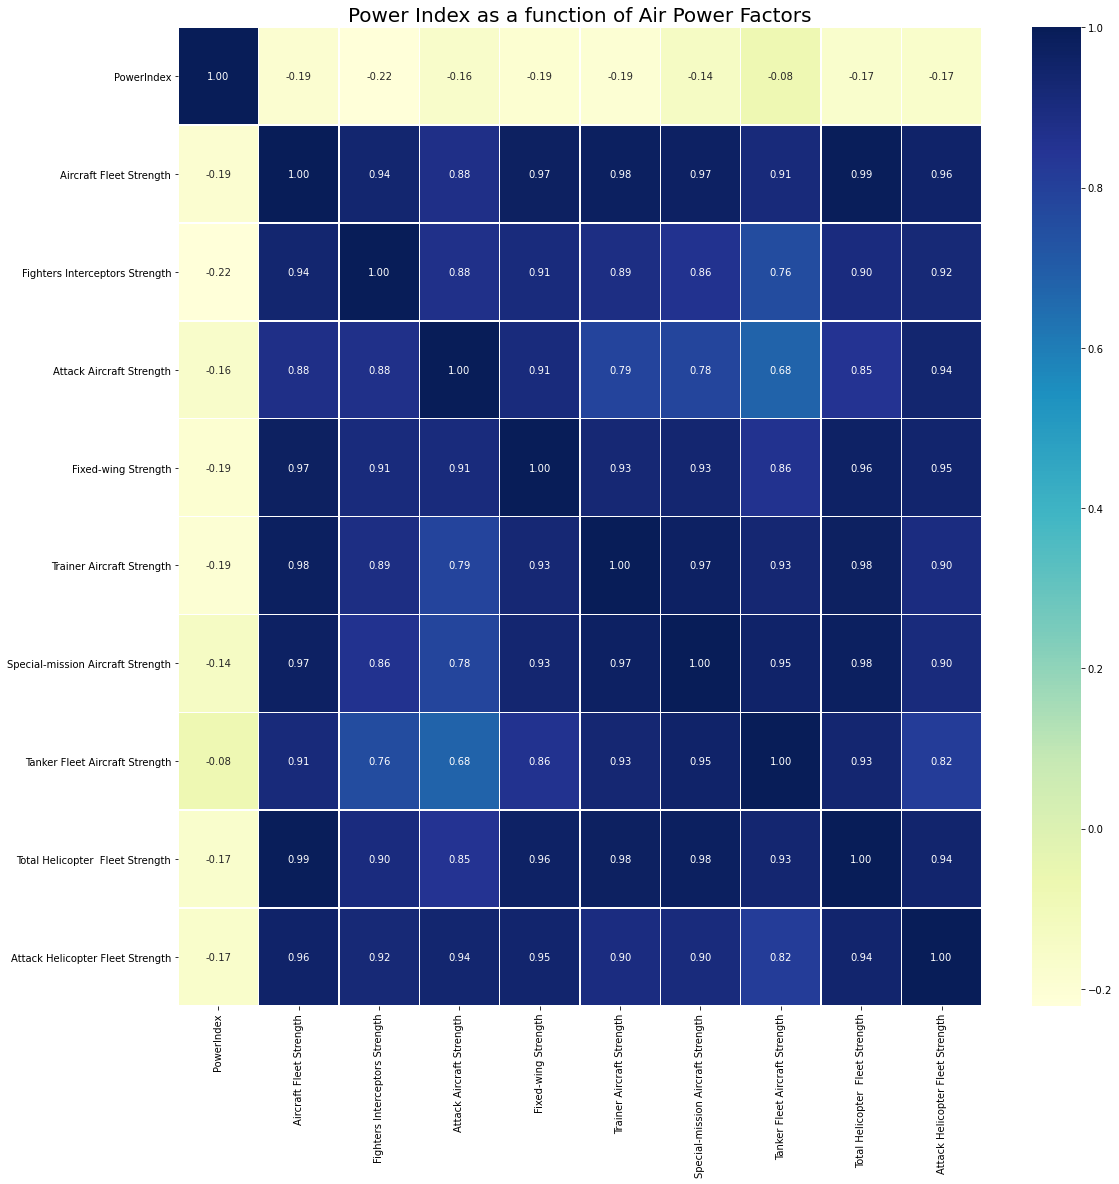

In [13]:
# Correlation of Power Index with Air Power Variables
df_FIREPOWER_AIR = df_FIREPOWER[['PowerIndex', 'Aircraft Fleet Strength',
       'Fighters Interceptors Strength', 'Attack Aircraft Strength',
       'Fixed-wing Strength', 'Trainer Aircraft Strength',
       'Special-mission Aircraft Strength', 'Tanker Fleet Aircraft Strength',
       'Total Helicopter  Fleet Strength', 'Attack Helicopter Fleet Strength']]

#  Air Power vs. Power Index Correlation Matrix
figureQuality, axisQuality = plt.subplots(figsize=(18, 18));
sns.heatmap(df_FIREPOWER_AIR.corr(), annot = True, linewidths = .5, fmt = '.02f', ax = axisQuality, cmap="YlGnBu");

plt.title('Power Index as a function of Air Power Factors', fontsize = 20)

As we can see, there is little correlation between the average countries power index as a function of air power exclusively. This observation would seem to indicate that the ability to project military strength does not stem from the air in isolation (in a simplistic view).

Other observatives that there is a strong correlation between training, fixed, tanker and attack aircraft (which would intuitively make sense). However, there is a lower correlation between tanker fleet strength and attack aircraft (which is probably due to the fact attack aircraft are typically launched from carriers or land in shorter range missions that do not require refueling).

Let's next look at mechanized warfare.

Text(0.5, 1.0, 'Power Index as a function of Mechanized Power Factors')

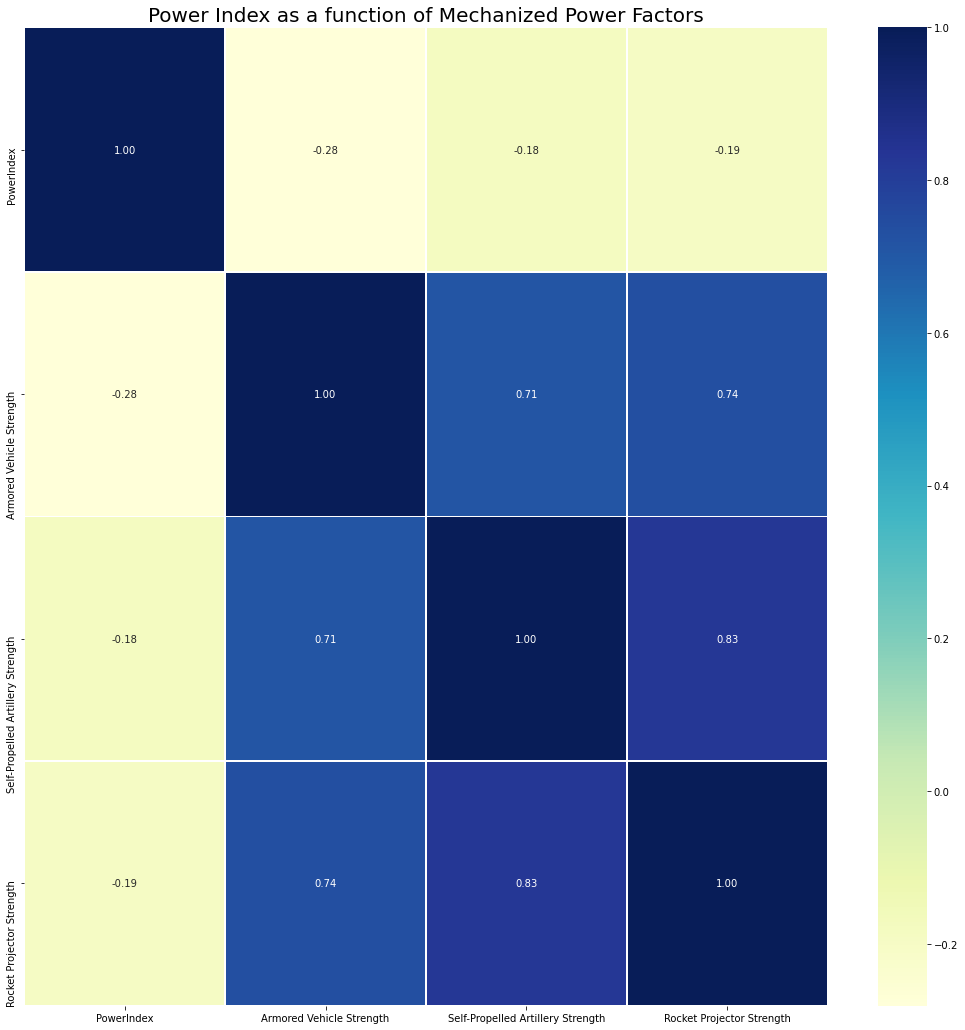

In [14]:
# Correlation of Power Index with Mechanized Power Variables
df_FIREPOWER_MECH = df_FIREPOWER[['PowerIndex', 'Armored Vehicle Strength',
       'Self-Propelled Artillery Strength', 'Rocket Projector Strength']]

#  Mechanized Power vs. Power Index Correlation Matrix
figureQuality, axisQuality = plt.subplots(figsize=(18, 18));
sns.heatmap(df_FIREPOWER_MECH.corr(), annot = True, linewidths = .5, fmt = '.02f', ax = axisQuality, cmap="YlGnBu");

plt.title('Power Index as a function of Mechanized Power Factors', fontsize = 20)

Here we see even a weaker correlation between the power index and mechanized warfare. However, there is a strong correlation between self-propelled artillery and rocket projectors (likely due to similar technologies being used).

Next up we will look at naval warfare:

Text(0.5, 1.0, 'Power Index as a function of Naval Power Factors')

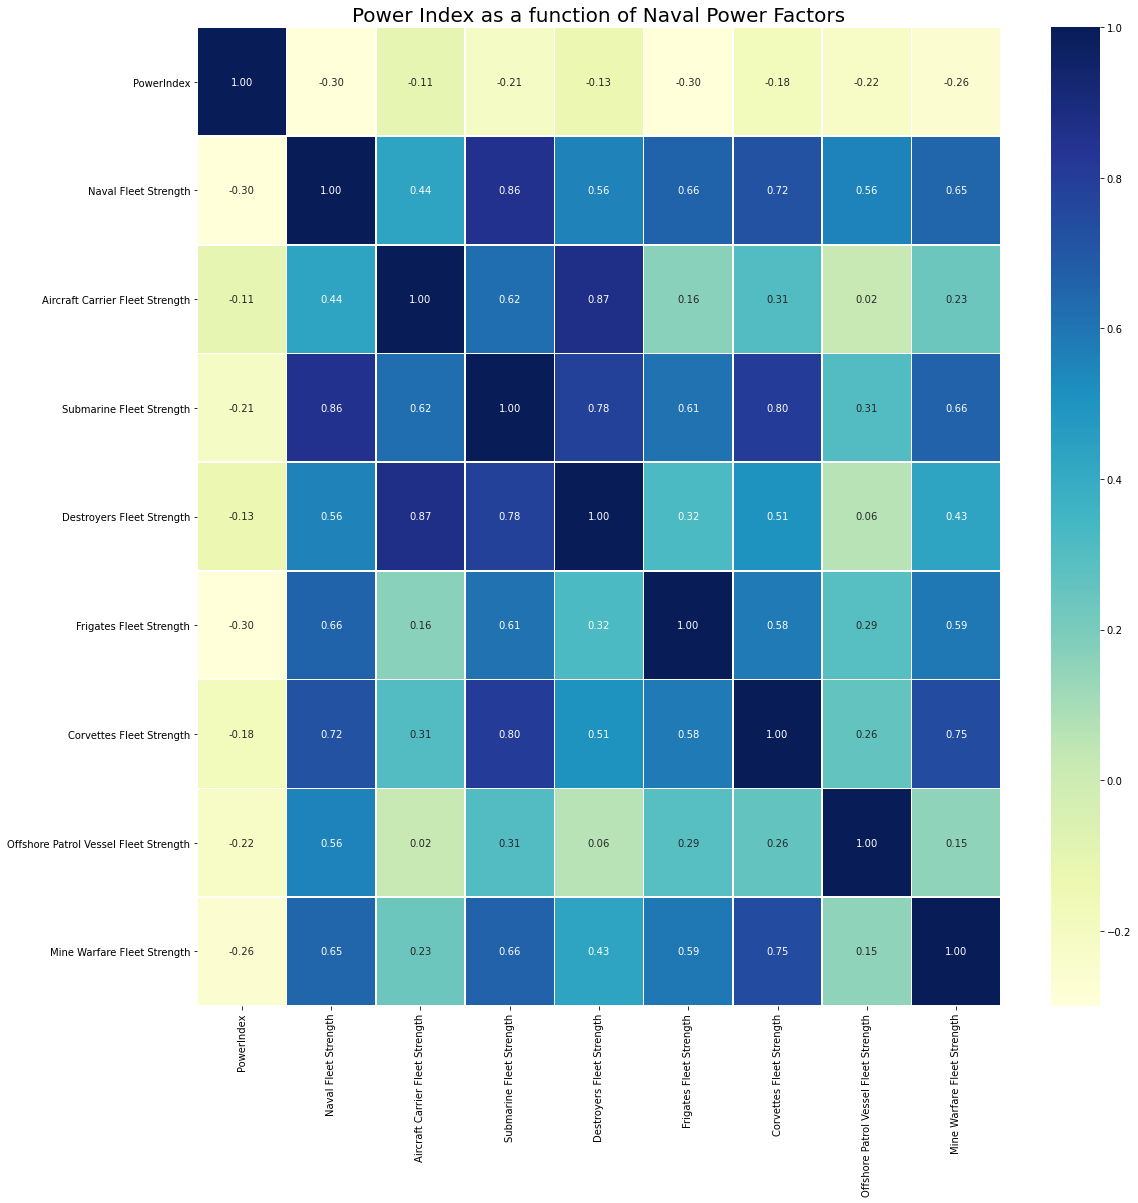

In [17]:
# Correlation of Power Index with Naval Power Variables
df_FIREPOWER_SEA = df_FIREPOWER[['PowerIndex', 'Naval Fleet Strength', 'Aircraft Carrier Fleet Strength',
       'Submarine Fleet Strength',
       'Destroyers Fleet Strength', 'Frigates Fleet Strength',
       'Corvettes Fleet Strength', 'Offshore Patrol Vessel Fleet Strength',
       'Mine Warfare Fleet Strength', 'Merchant Marine Fleet Strength']]

#  Naval Power vs. Power Index Correlation Matrix
figureQuality, axisQuality = plt.subplots(figsize=(18, 18));
sns.heatmap(df_FIREPOWER_SEA.corr(), annot = True, linewidths = .5, fmt = '.02f', ax = axisQuality, cmap="YlGnBu");

plt.title('Power Index as a function of Naval Power Factors', fontsize = 20)

We see the weakest correlation between naval power and total firepower as a whole. However, within naval strength we see the strongest correlation with submarine fleet strength. This observation could be possible because of the smaller crews and their use in ISR.

Moreover, we see a strong correlation between aircraft carrier strength and destroyer strength. This observation makes sense because destroyers typically serve as protection for carriers. Finally, we see a strong correlation between corvettes and mine warfare - corvettes are often use in mine clearing.

Next we will look at some facilities factors.

Text(0.5, 1.0, 'Power Index as a function of Facility Factors')

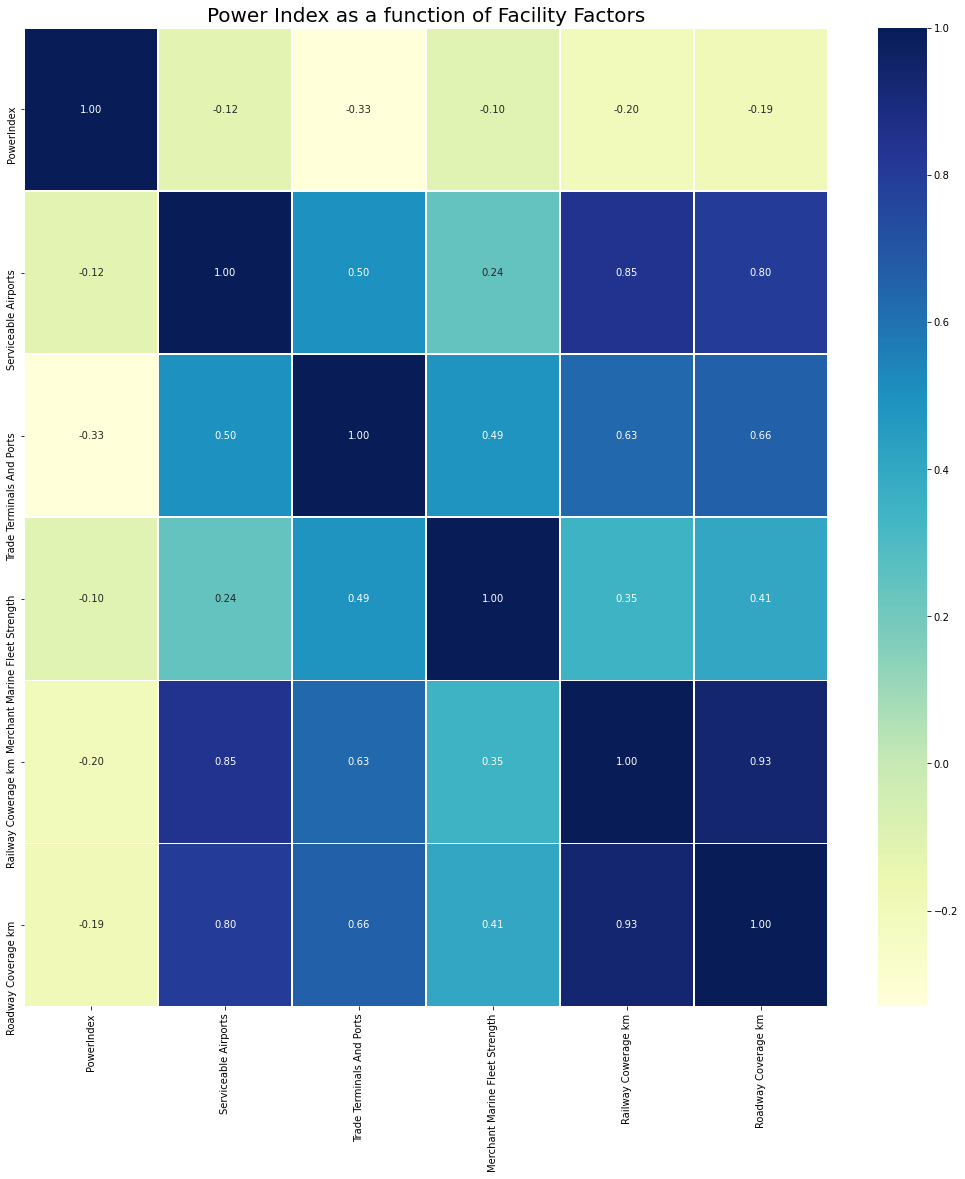

In [20]:
# Correlation of Power Index with Facility Power Variables
df_FIREPOWER_FAC = df_FIREPOWER[['PowerIndex', 'Serviceable Airports',
       'Trade Terminals And Ports',
       'Merchant Marine Fleet Strength', 'Railway Cowerage km',
       'Roadway Coverage km']]

#  Facility Factors vs. Power Index Correlation Matrix
figureQuality, axisQuality = plt.subplots(figsize=(18, 18));
sns.heatmap(df_FIREPOWER_FAC.corr(), annot = True, linewidths = .5, fmt = '.02f', ax = axisQuality, cmap="YlGnBu");

plt.title('Power Index as a function of Facility Factors', fontsize = 20)

Of all the factors thusfar, the closest correlation to the overall Power Index involves facility factors. A possible hypothesis for this observation is that the ability to transport personnel and equipment to theater quickly and en masse means superior firepower can be provided in a flashpoint.

We see strong correlations between railway and roadways as well as airports and seaports, supporting the hypothesis above.